In [15]:
#叠图
from astropy.time import Time
from astropy import units as u
from poliastro.bodies import Earth, Mars, Sun, Jupiter, Saturn
from poliastro.twobody import Orbit
from poliastro.plotting.static import StaticOrbitPlotter
from poliastro.twobody.propagation import mean_motion, kepler, cowell
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from astropy.coordinates import SphericalRepresentation
from astropy.coordinates import CartesianRepresentation
import numpy as np
import math
days = 120
#orbital elements
t = []
a = []
ecc = []
inc = []
raan = []
argp = []

#C/2019 Y4    0
time = "2020-05-31T00:51:39"
t.append(Time(time, format='isot', scale='tdb'))
a.append(29489228424 * u.km)
ecc.append(0.99871621 * u.one)
inc.append(45.31898912 * u.deg)
raan.append(120.51143626815 * u.deg)
argp.append(177.46987924671 * u.deg)

#C/2006 P1    1
t.append(Time(2454113.298853878393, format='jd', scale='tdb'))
a.append(-8953.846942964639  * u.AU)
ecc.append(1.000019068501381 * u.one)
inc.append(77.83699331528216 * u.deg)
raan.append(267.4147914157445 * u.deg)
argp.append(155.974955723039 * u.deg)

#C/1965 S1 (Ikeya-Seki)  2
t.append(Time(2439054.6837, format='jd',scale='tdb'))
a.append(91.6000000  * u.AU)
ecc.append(0.999915 * u.one)
inc.append(141.8642 * u.deg)
raan.append(346.9947 * u.deg)
argp.append(69.0486 * u.deg)

#1P/Halley   3
t.append(Time(2446467.395317050925, format='jd',scale='tdb'))
a.append(17.8341442925537  * u.AU)
ecc.append(0.967142908462304 * u.one)
inc.append(162.262690579161 * u.deg)
raan.append(58.42008097656843  * u.deg)
argp.append(111.3324851045177 * u.deg)

#C/2012 S1 (ISON)   4
t.append(Time(2456625.278658273561, format='jd',scale='tdb'))
a.append(-61.95201446552018  * u.AU)
ecc.append(1.000201003833968 * u.one)
inc.append(62.40397752235779 * u.deg)
raan.append(295.65203155  * u.deg)
argp.append(345.5312406205832  * u.deg)

#C/2011 W3 (Lovejoy)   5
t.append(Time(2455911.511809000032, format='jd',scale='tdb'))
a.append(78.68293963959538  * u.AU)
ecc.append(0.9999294152687143 * u.one)
inc.append(134.3558107377023 * u.deg)
raan.append(326.3691470244605  * u.deg)
argp.append(53.50921241435645  * u.deg)

#C/1995 O1 (Hale-Bopp)   6
t.append(Time(2450538.437848275592, format='jd',scale='tdb'))
a.append(182.0519703474959  * u.AU)
ecc.append(0.9949607008417696  * u.one)
inc.append(89.21708989130315 * u.deg)
raan.append(282.9487539423989  * u.deg)
argp.append(130.662020526416  * u.deg)

#C/1996 B2 (Hyakutake)   7
t.append(Time(2450204.894088137433, format='jd',scale='tdb'))
a.append(2272.079439771763  * u.AU)
ecc.append(0.9998986702212276 * u.one)
inc.append(124.9226625944912 * u.deg)
raan.append(188.0452284985425  * u.deg)
argp.append(130.1740835084622  * u.deg)

#C/2011 L4 (PANSTARRS)   8
t.append(Time(2456361.669949932096, format='jd',scale='tdb'))
a.append(-9217.613572306012  * u.AU)
ecc.append(1.000032713934215 * u.one)
inc.append(84.20818671265653 * u.deg)
raan.append(65.66588341697526  * u.deg)
argp.append(333.6516382152546  * u.deg)

#17P/Holmes   9
t.append(Time(2456744.012627847256, format='jd',scale='tdb'))
a.append(3.619609985314088  * u.AU)
ecc.append(0.4318134405110877 * u.one)
inc.append(19.09175525320228 * u.deg)
raan.append(326.764799658168  * u.deg)
argp.append(24.515349359396  * u.deg)

ra = []
da = []
    
for i in range(0,10):
    #planets' elements
    se = Orbit.from_body_ephem(Earth,t[i])
#sm = Orbit.from_body_ephem(Mars,t)
#sj = Orbit.from_body_ephem(Jupiter,t)
#ss = Orbit.from_body_ephem(Saturn,t)
    sc = Orbit.from_classical(Sun,a[i],ecc[i],inc[i],raan[i],argp[i],0 * u.deg,t[i]) #彗星近日点位置
    setemp = Orbit.from_classical(Sun,se.a,se.ecc,se.inc,se.raan,se.argp,se.nu,t[i])
    dinc = se.inc

#orbit per day
    orbnc = [[],[],[]] #comet[[xs],[ys],[zs]]
    orbne = [[],[],[]] #earth

    

    r = []
    d = []
    for x in np.linspace(-days * u.day,days * u.day, days* 2 + 1):
        orbnctemp = sc.propagate(x,method = mean_motion)
        pn1 = orbnctemp.represent_as(CartesianRepresentation)
        orbnc[0].append(pn1.x.value)
        orbnc[1].append(-pn1.y.value)
        orbnc[2].append(-pn1.z.value)
        xc = pn1.x.value / (1.5 * 10**8)
        yc = pn1.y.value / (1.5 * 10**8)
        zc = pn1.z.value / (1.5 * 10**8)
        orbnetemp = setemp.propagate(x,method = mean_motion)
        pn2 = orbnetemp.represent_as(CartesianRepresentation)
        orbne[0].append(pn2.x.value)
        orbne[1].append(-pn2.y.value)
        orbne[2].append(-pn2.z.value)
        xe = pn2.x.value / (1.5 * 10**8)
        ye = pn2.y.value / (1.5 * 10**8)
        ze = pn2.z.value / (1.5 * 10**8)
        r.append(math.sqrt(xc**2+yc**2+zc**2))
        d.append(math.sqrt((xe-xc)**2+(ye-yc)**2+(ze-zc)**2))
    ra.append(r)
    da.append(d)
    
M = []
k = []
#Y4
M.append(7.7)
k.append(21.5)
#C/2006 P1
M.append(9.5)
k.append(10)
#C/1965 S1 (Ikeya-Seki)
M.append(7.36264047)
k.append(6.15695077)
#1P/Halley
M.append(5.5)
k.append(8.0)
#C/2012 S1 (ISON)
M.append(8)
k.append(8)
#C/2011 W3 (Lovejoy)
M.append(15.3)
k.append(9.3)
#C/1995 O1 (Hale-Bopp)
M.append(4.0)
k.append(8)
#C/1996 B2 (Hyakutake)
M.append(7.3)
k.append(11)
#C/2011 L4 (PANSTARRS)
M.append(7.5)
k.append(7)
#17P/Holmes
M.append(8.9)
k.append(15)

print("end")

end


In [101]:
#叠图
import matplotlib.pylab as plt
#m = M + 5lgd + klgr


#C/2019 Y4               0
#C/2006 P1               1
#C/1965 S1 (Ikeya-Seki)  2
#1P/Halley               3
#C/2012 S1 (ISON)        4
#C/2011 W3 (Lovejoy)     5
#C/1995 O1 (Hale-Bopp)   6
#C/1996 B2 (Hyakutake)   7
#C/2011 L4 (PANSTARRS)   8
#17P/Holmes              9
legend1 = ['C/2019 Y4','C/2006 P1','C/1965 S1 (Ikeya-Seki)','1P/Halley','C/2012 S1 (ISON)',
           'C/2011 W3 (Lovejoy)','C/1995 O1 (Hale-Bopp)','C/1996 B2 (Hyakutake)',
           'C/2011 L4 (PANSTARRS)','17P/Holmes']
legend2 = ['C2019 Y4','C2006 P1','C1965 S1 (Ikeya-Seki)','1PHalley','C2012 S1 (ISON)',
           'C2011 W3 (Lovejoy)','C1995 O1 (Hale-Bopp)','C1996 B2 (Hyakutake)',
           'C2011 L4 (PANSTARRS)','17PHolmes']
y = []
y1 = []
y2 = []
i = 9

for x in np.linspace(0,days*2,days*2+1):
    x = int(x)
    y.append(M[i] + 5 * math.log10(da[i][x]) + k[i] * math.log10(ra[i][x]))
    #y1.append(M + 5 * math.log10(d[x]) + k * math.log10(r[x]))
    #y2.append(12 + 5 * math.log10(d[x]) + 10 * math.log10(r[x]))
'''
x = np.linspace(-days,days,days*2+1)
plt.figure(figsize = [6,4],dpi=300)
plt.xlabel('days from perihelion')
plt.ylabel('magnitude')
plt.title('C/1995 O1 (Hale-Bopp)')
plt.plot(x,y,color="blue")

plt.ylim(max(y)+1,min(y)-1)
#plt.plot(x,y1,color="blue")
#plt.plot(x,y2,color="red")
#plt.ylim(max([max(y1),max(y2)])+1,min([min(y1),min(y2)])-1)
plt.savefig("C_1995_O1_(Hale-Bopp).jpg")
plt.show()
'''
y = []
ya = []
yd = []
plots = []
x = np.linspace(-days,days,days*2+1)


for i1 in range(0,10):
    for i2 in np.linspace(0,days*2,days*2+1):
        i2 = int(i2)
        value = M[i1] + 5 * math.log10(da[i1][i2]) + k[i1] * math.log10(ra[i1][i2])
        y.append(value)
        #y1.append(M + 5 * math.log10(d[x]) + k * math.log10(r[x]))
        #y2.append(12 + 5 * math.log10(d[x]) + 10 * math.log10(r[x]))
        ya.append(value)
    yd.append(y)
    y = []
    

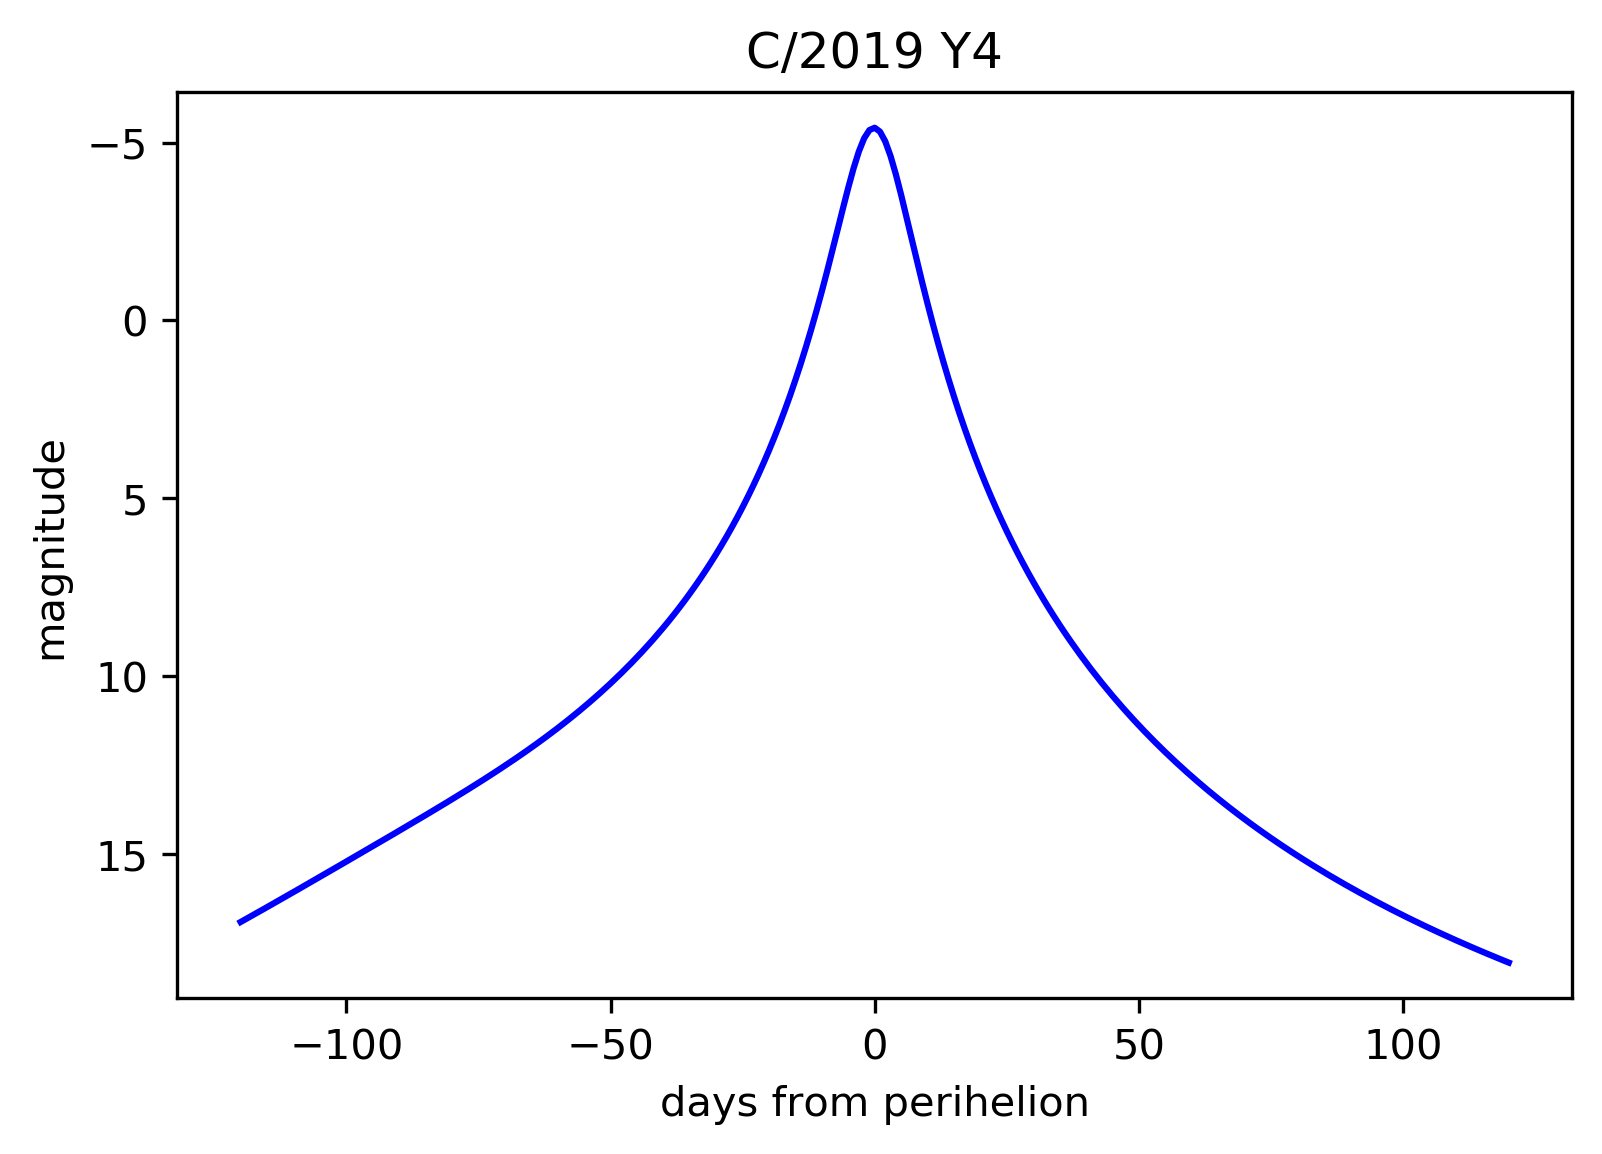

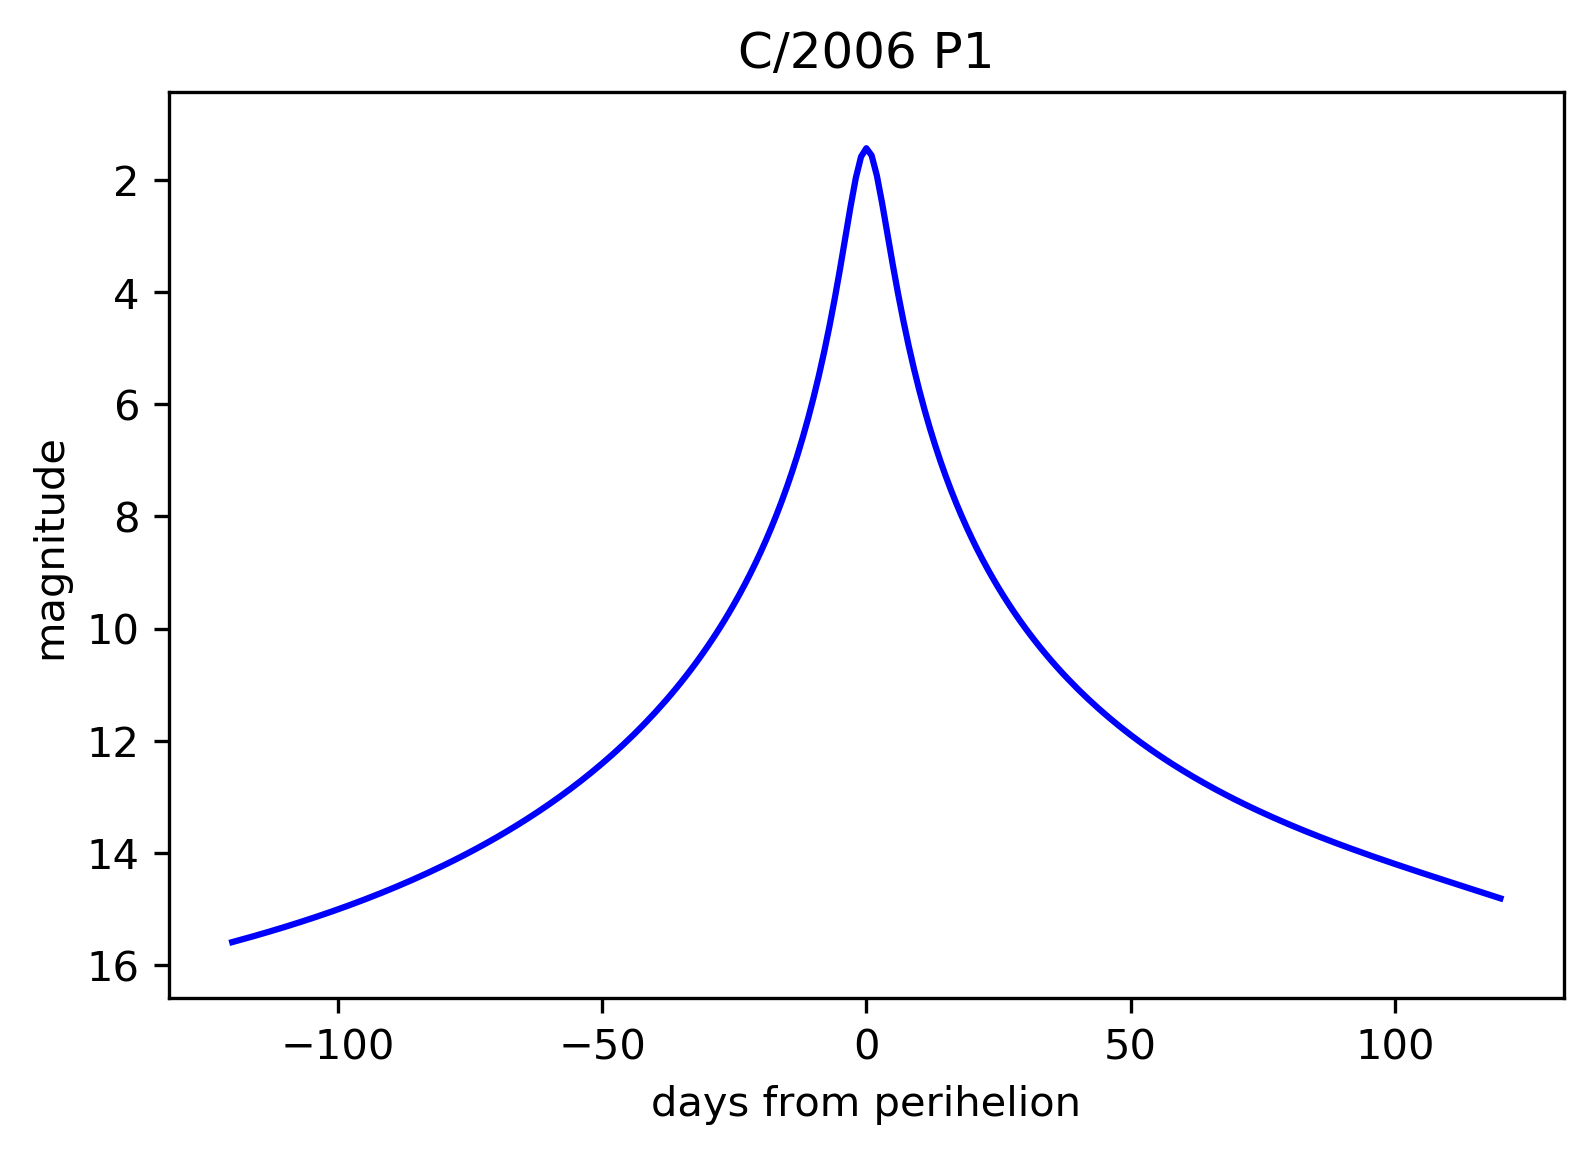

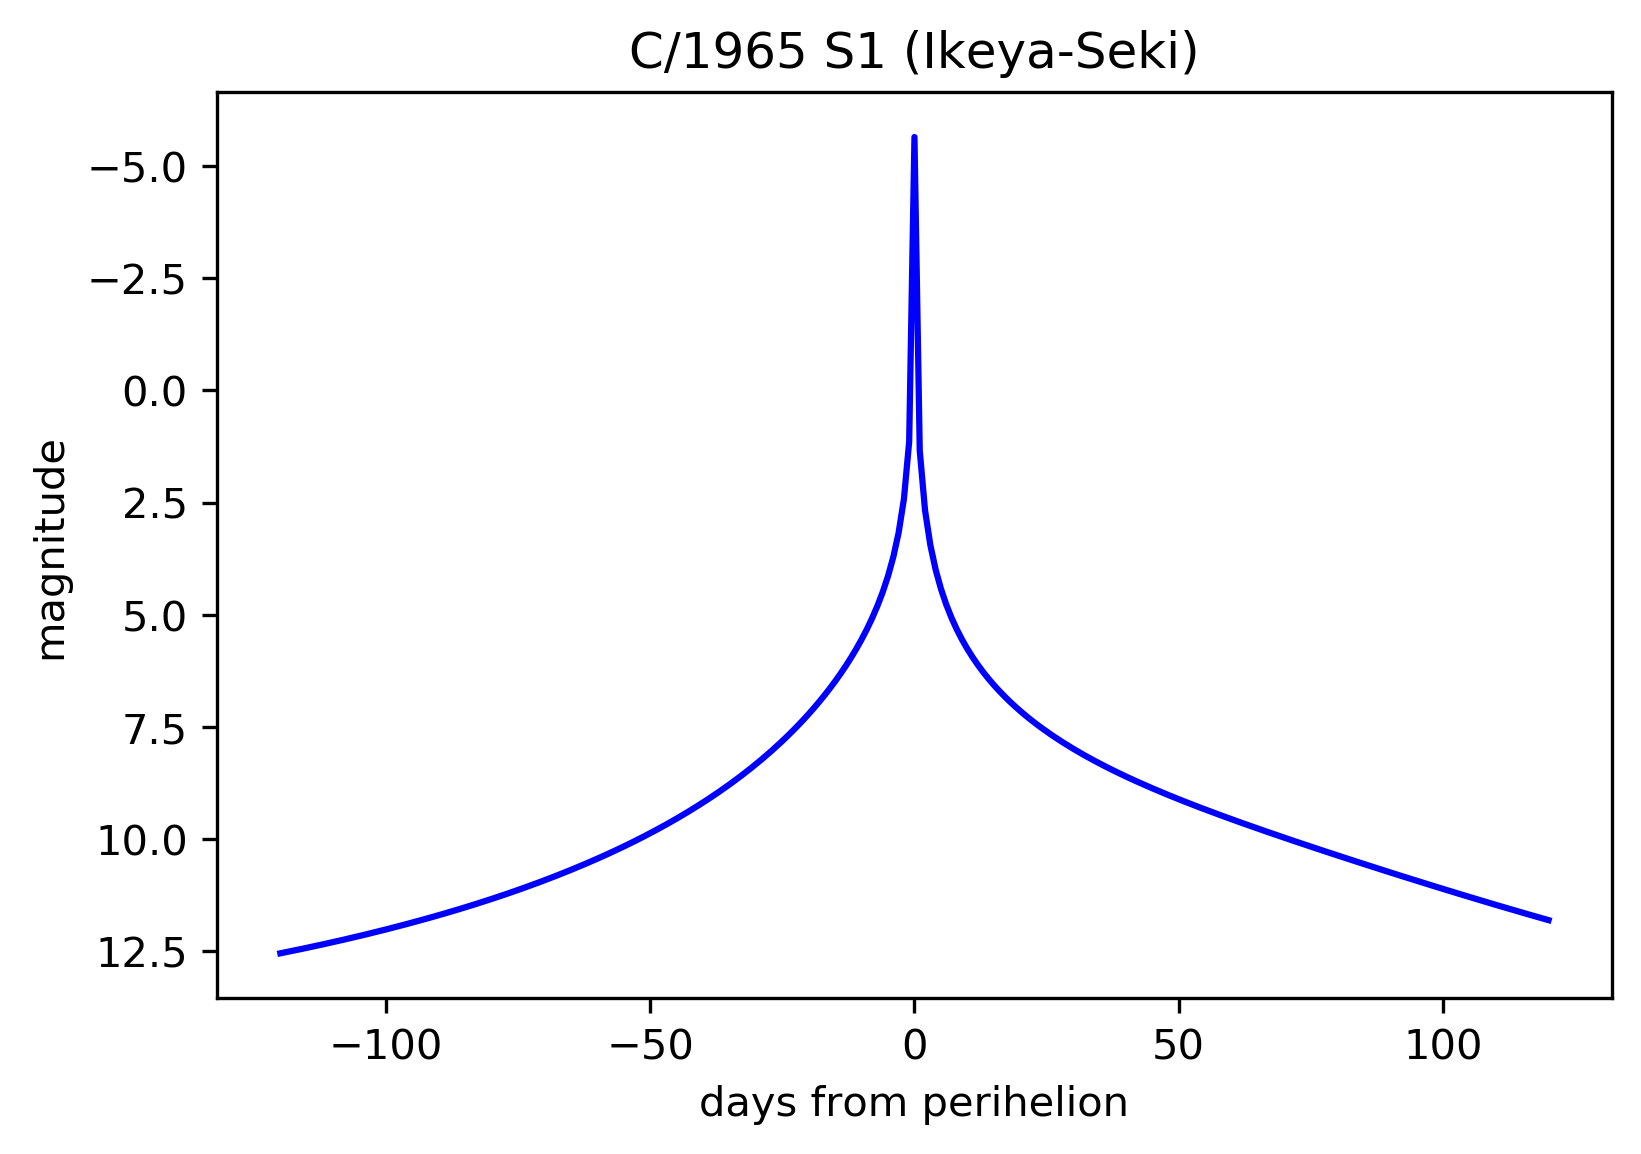

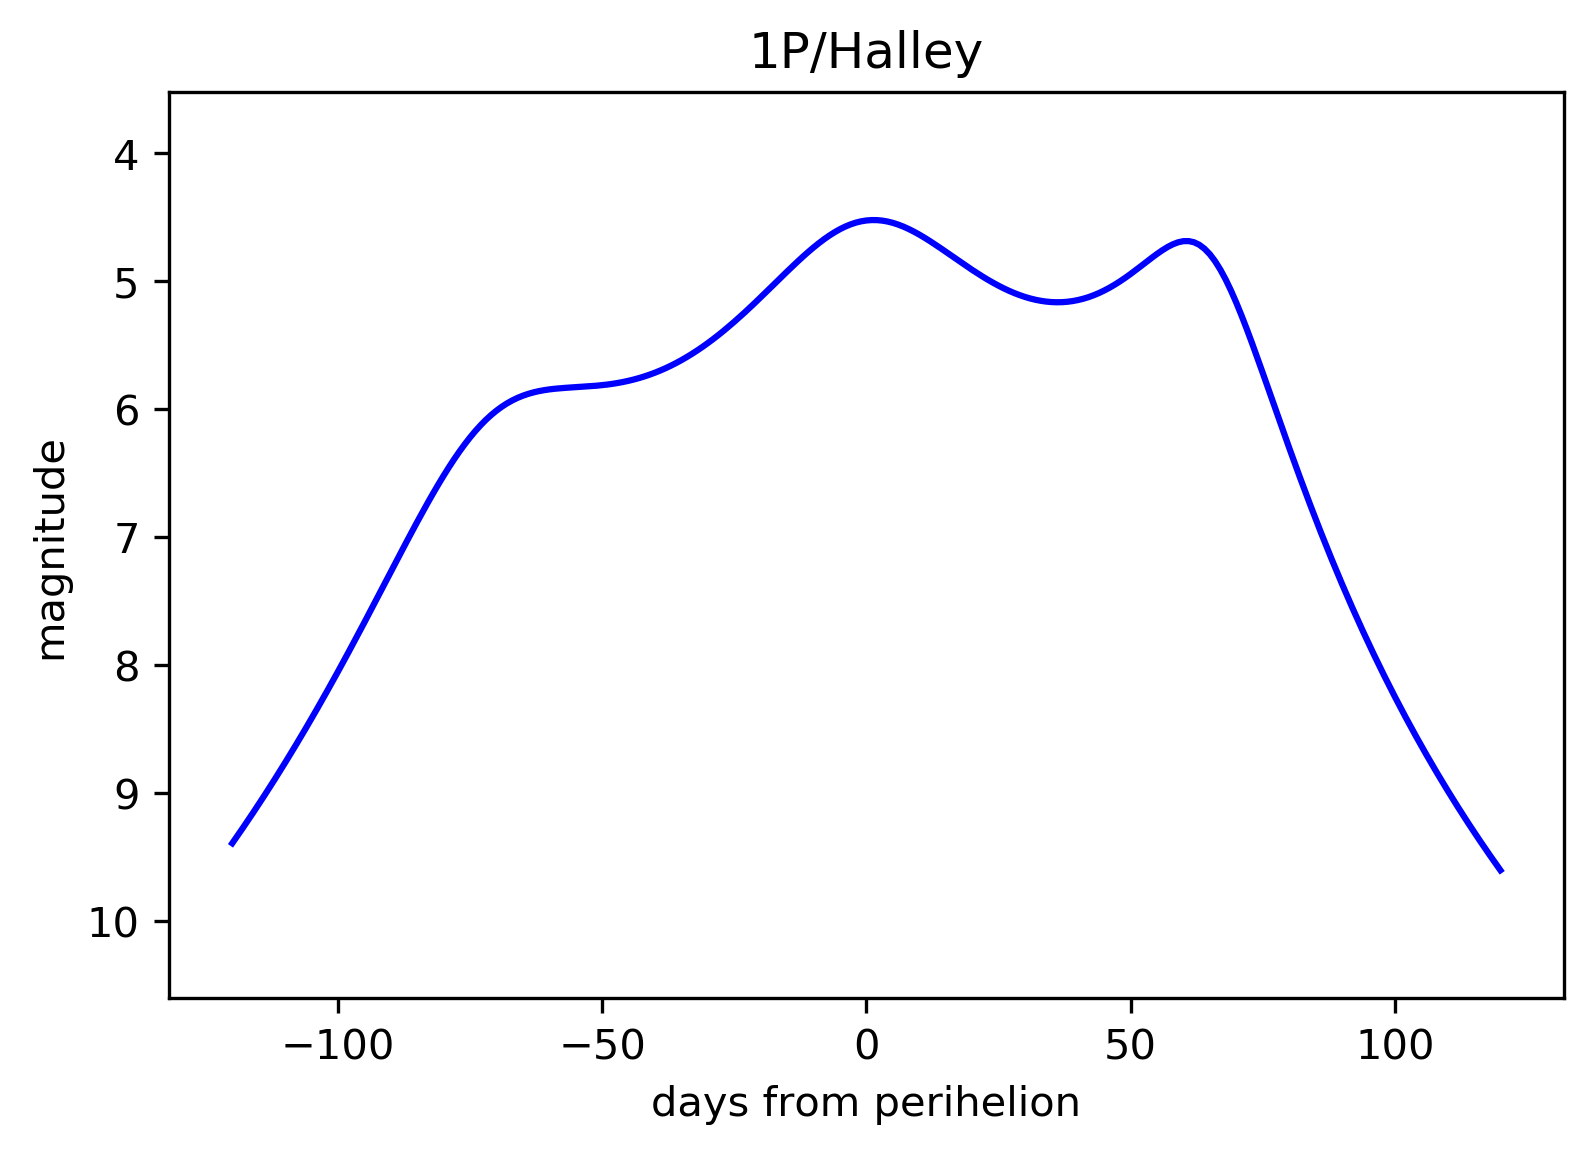

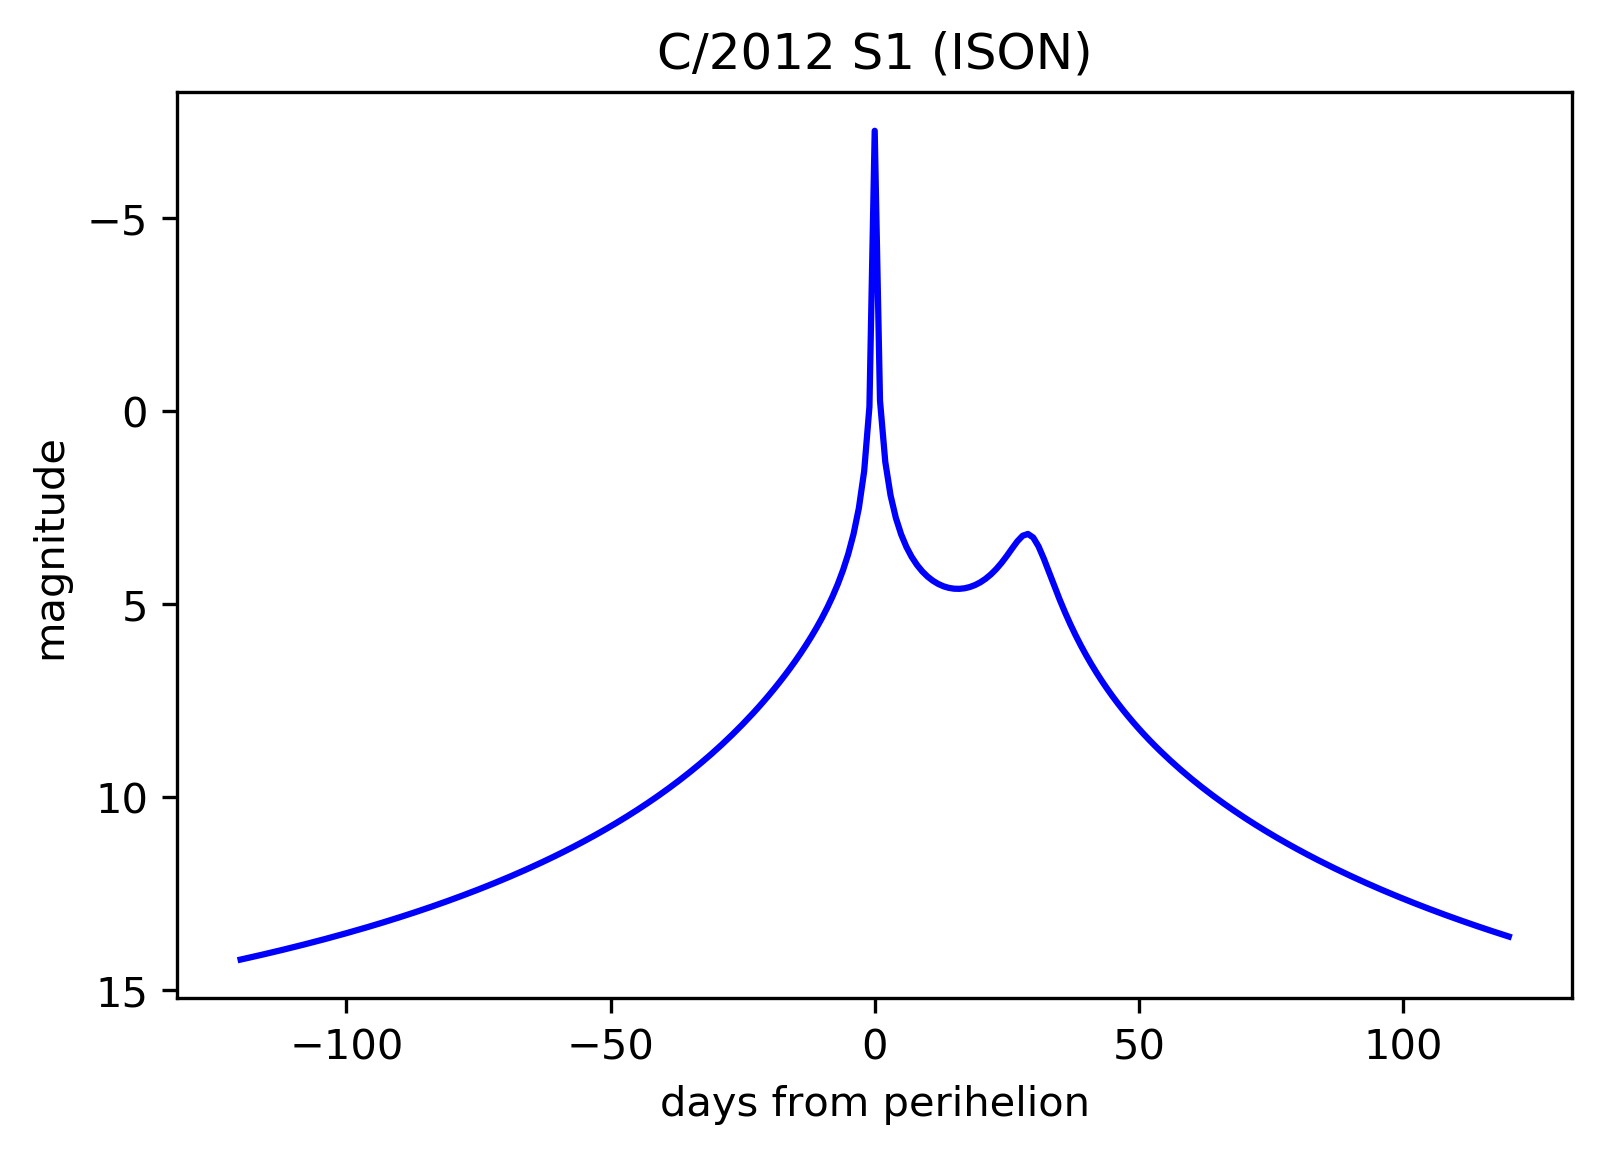

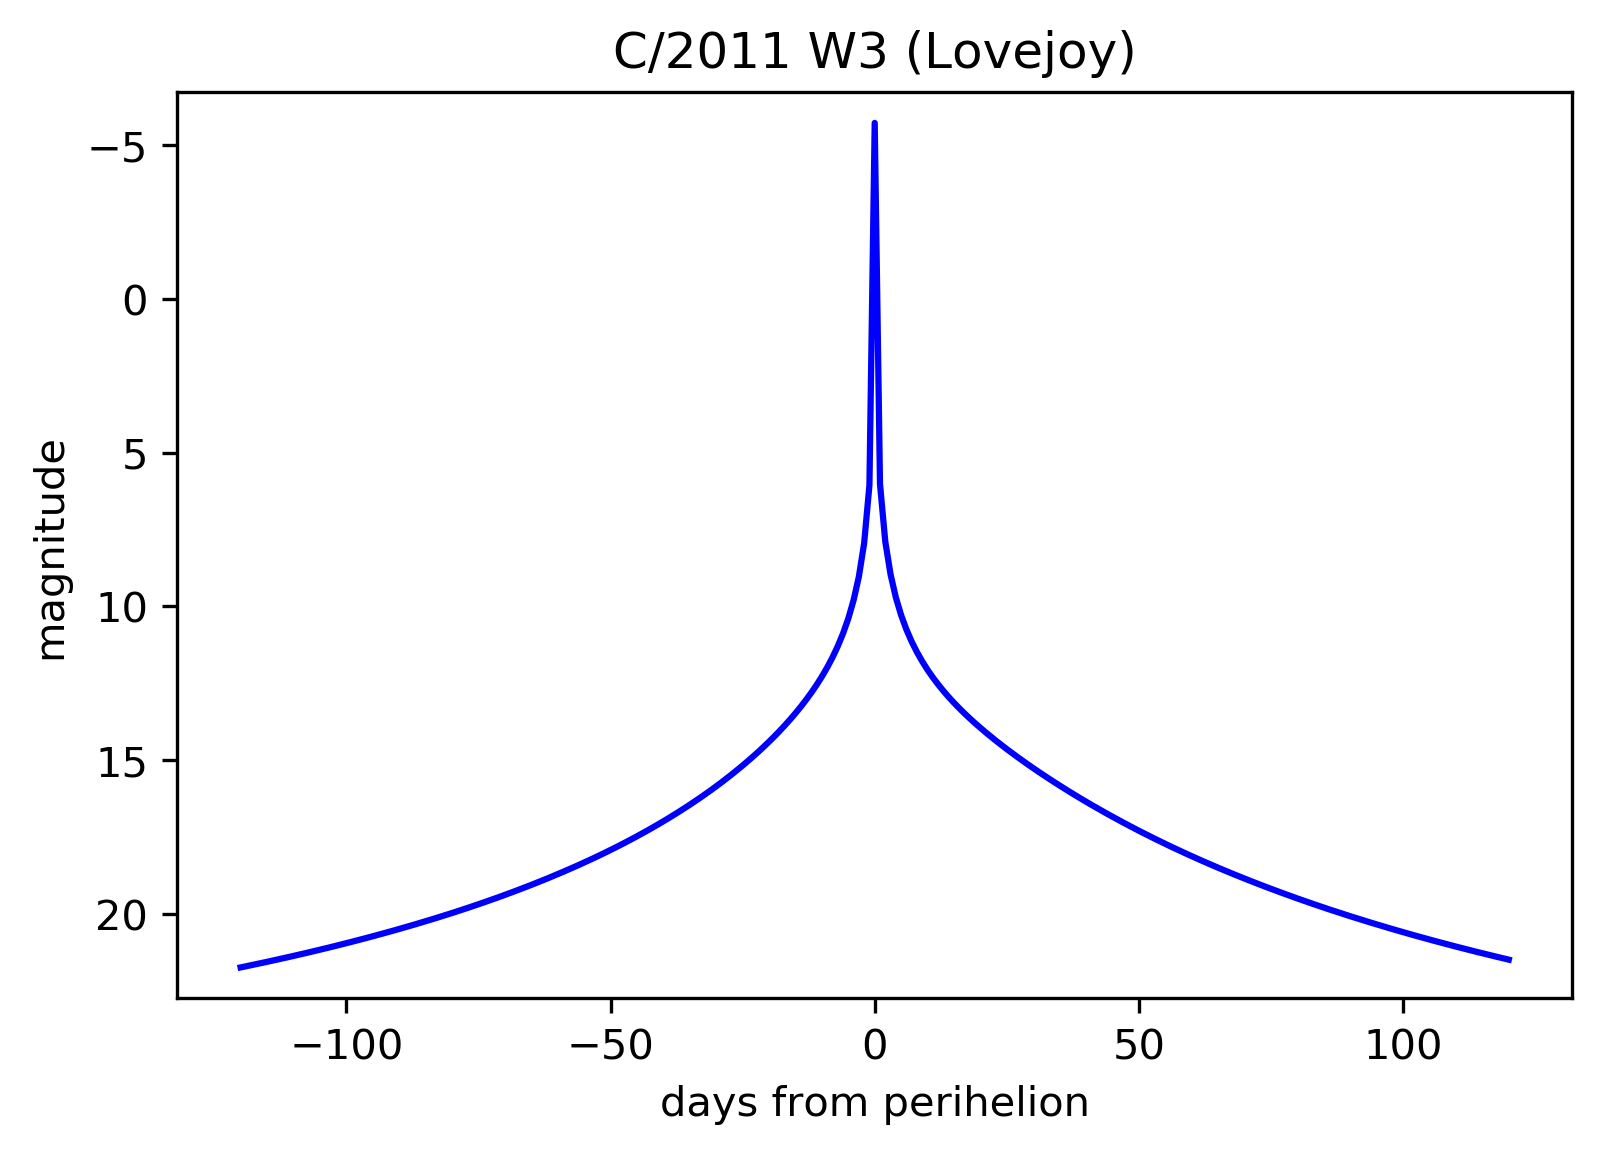

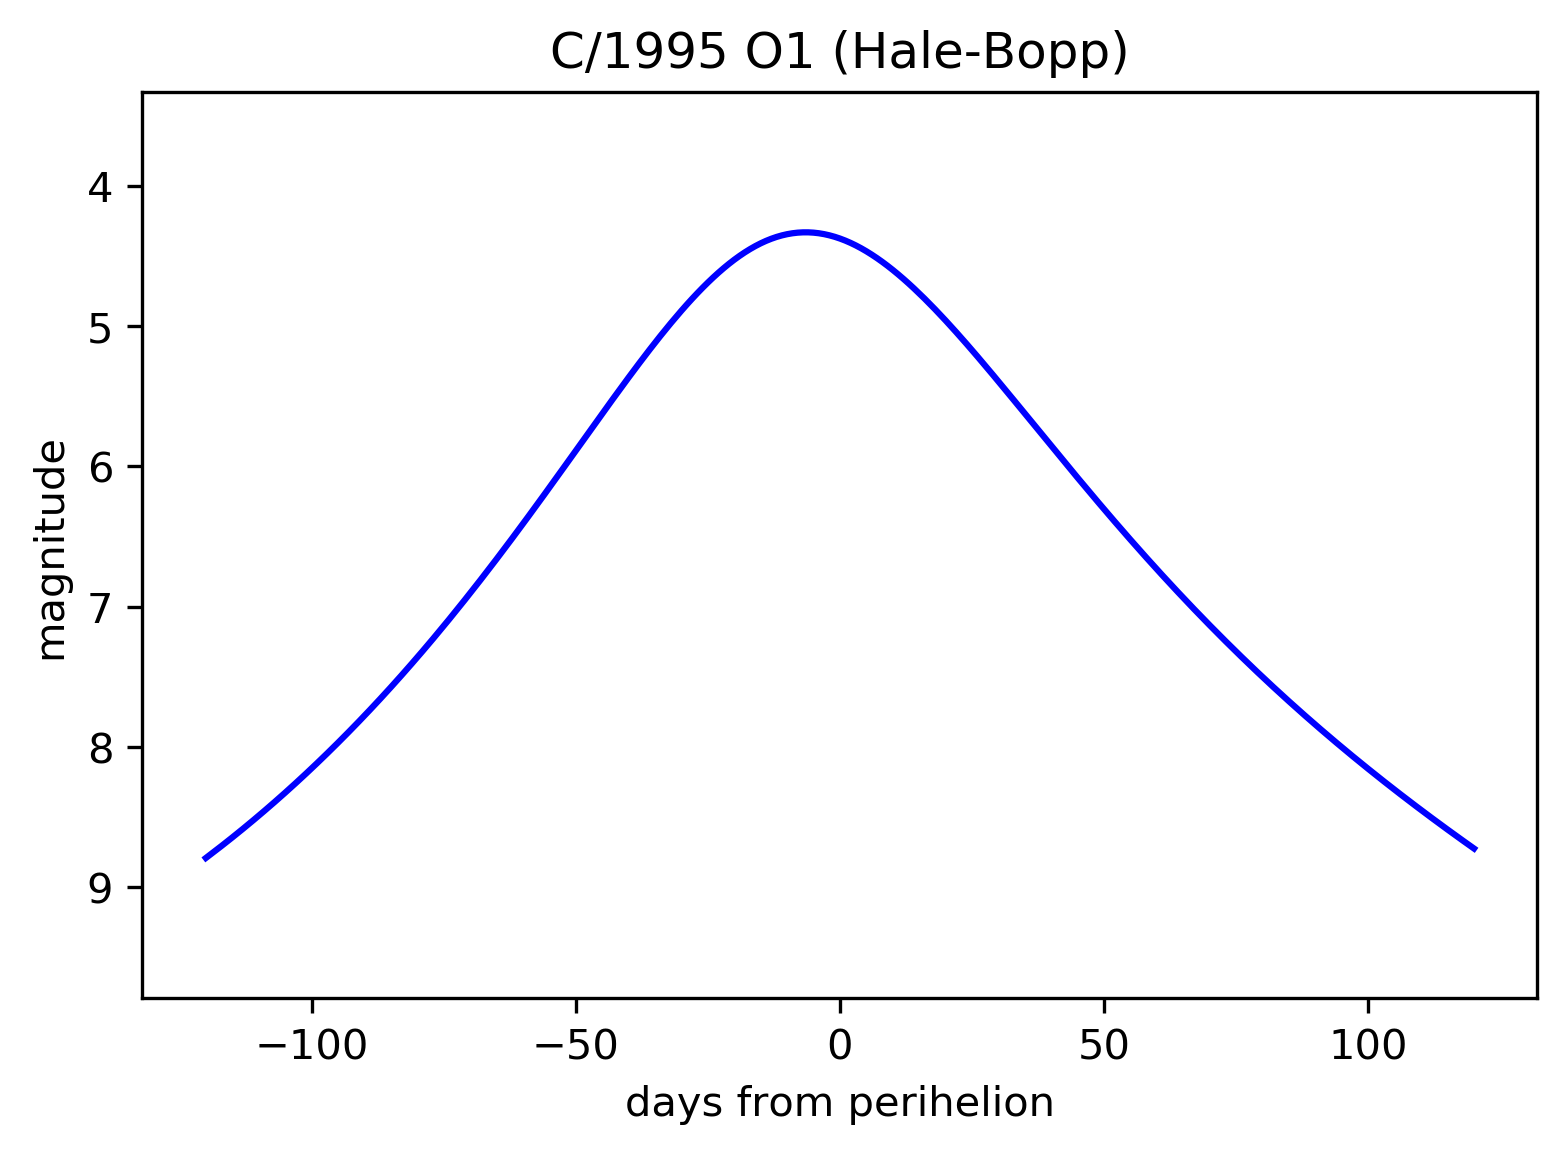

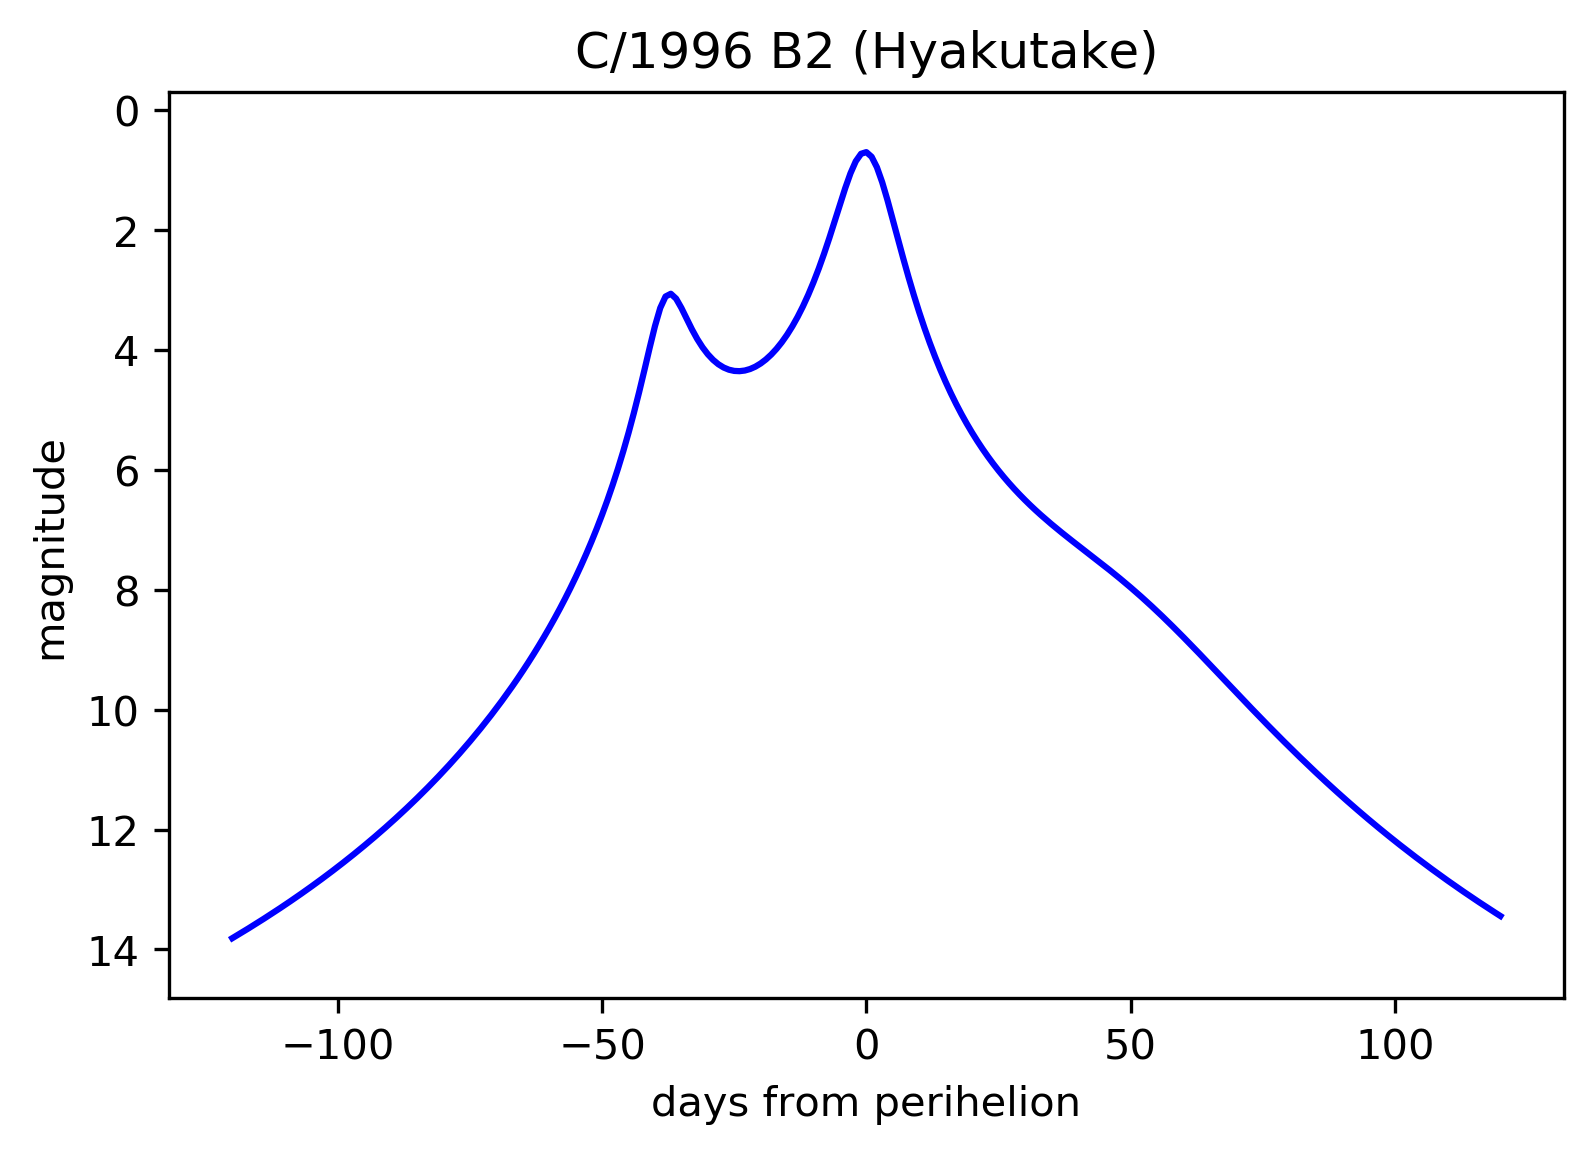

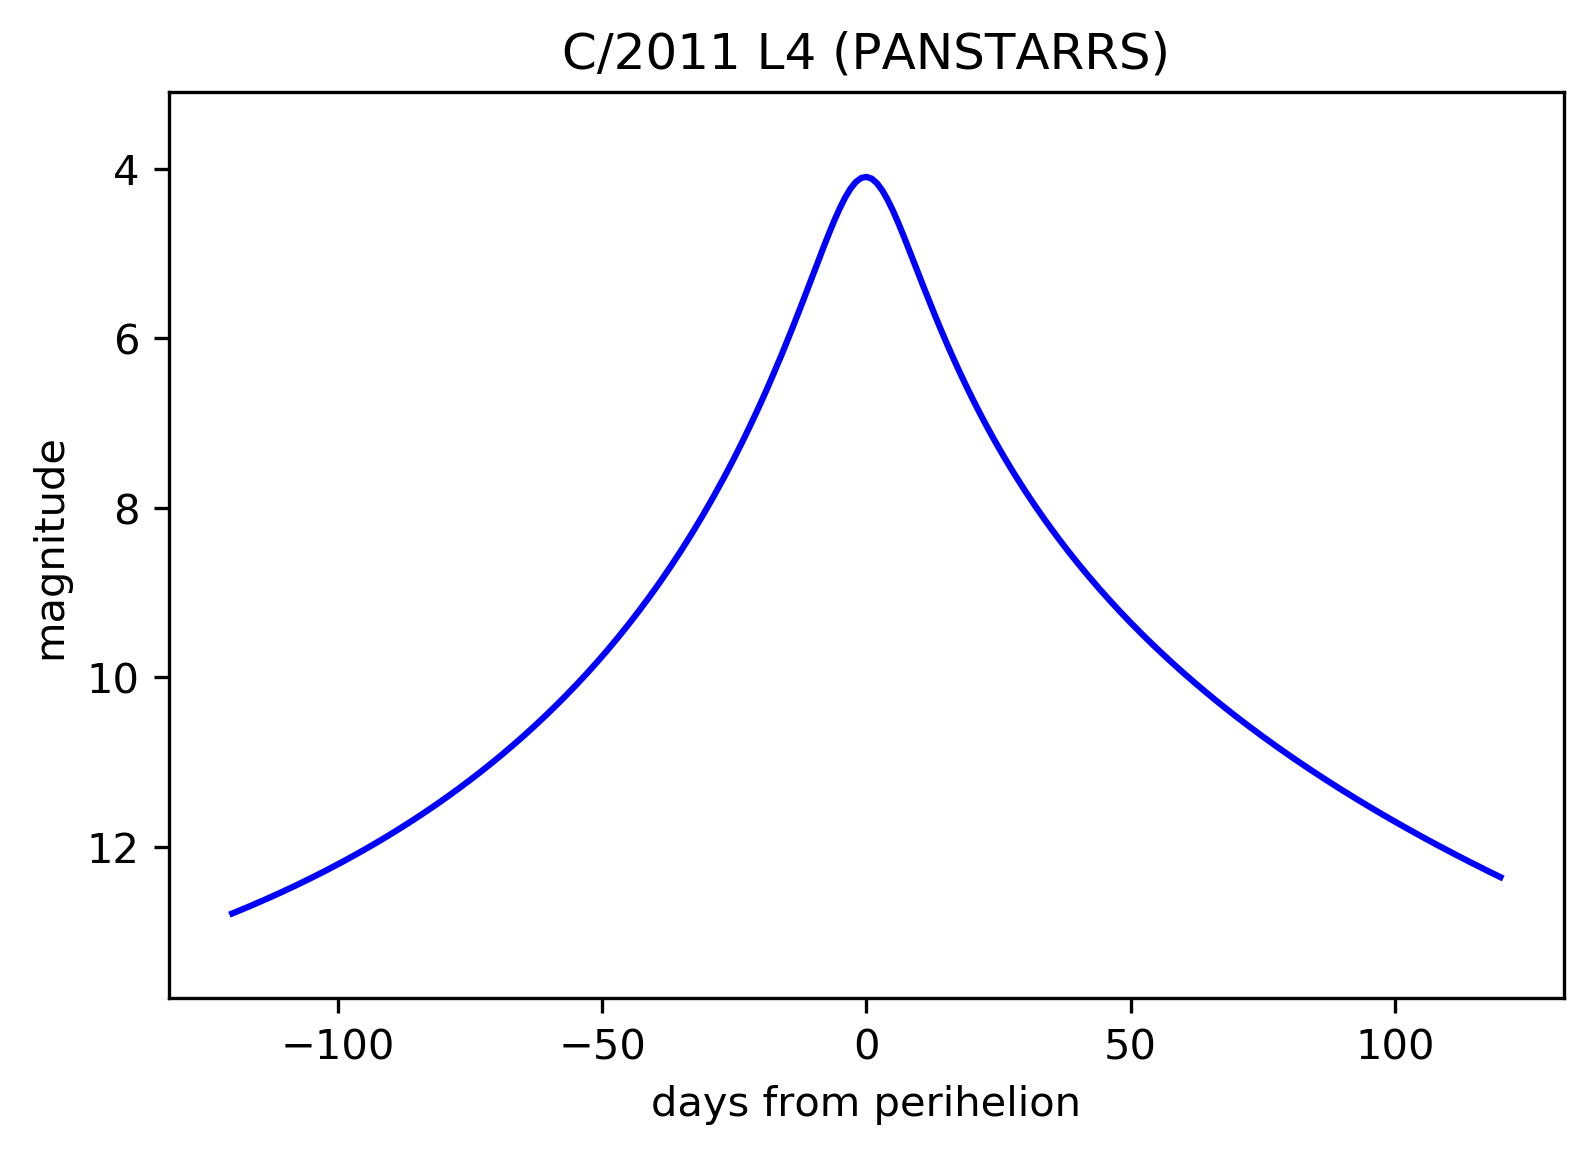

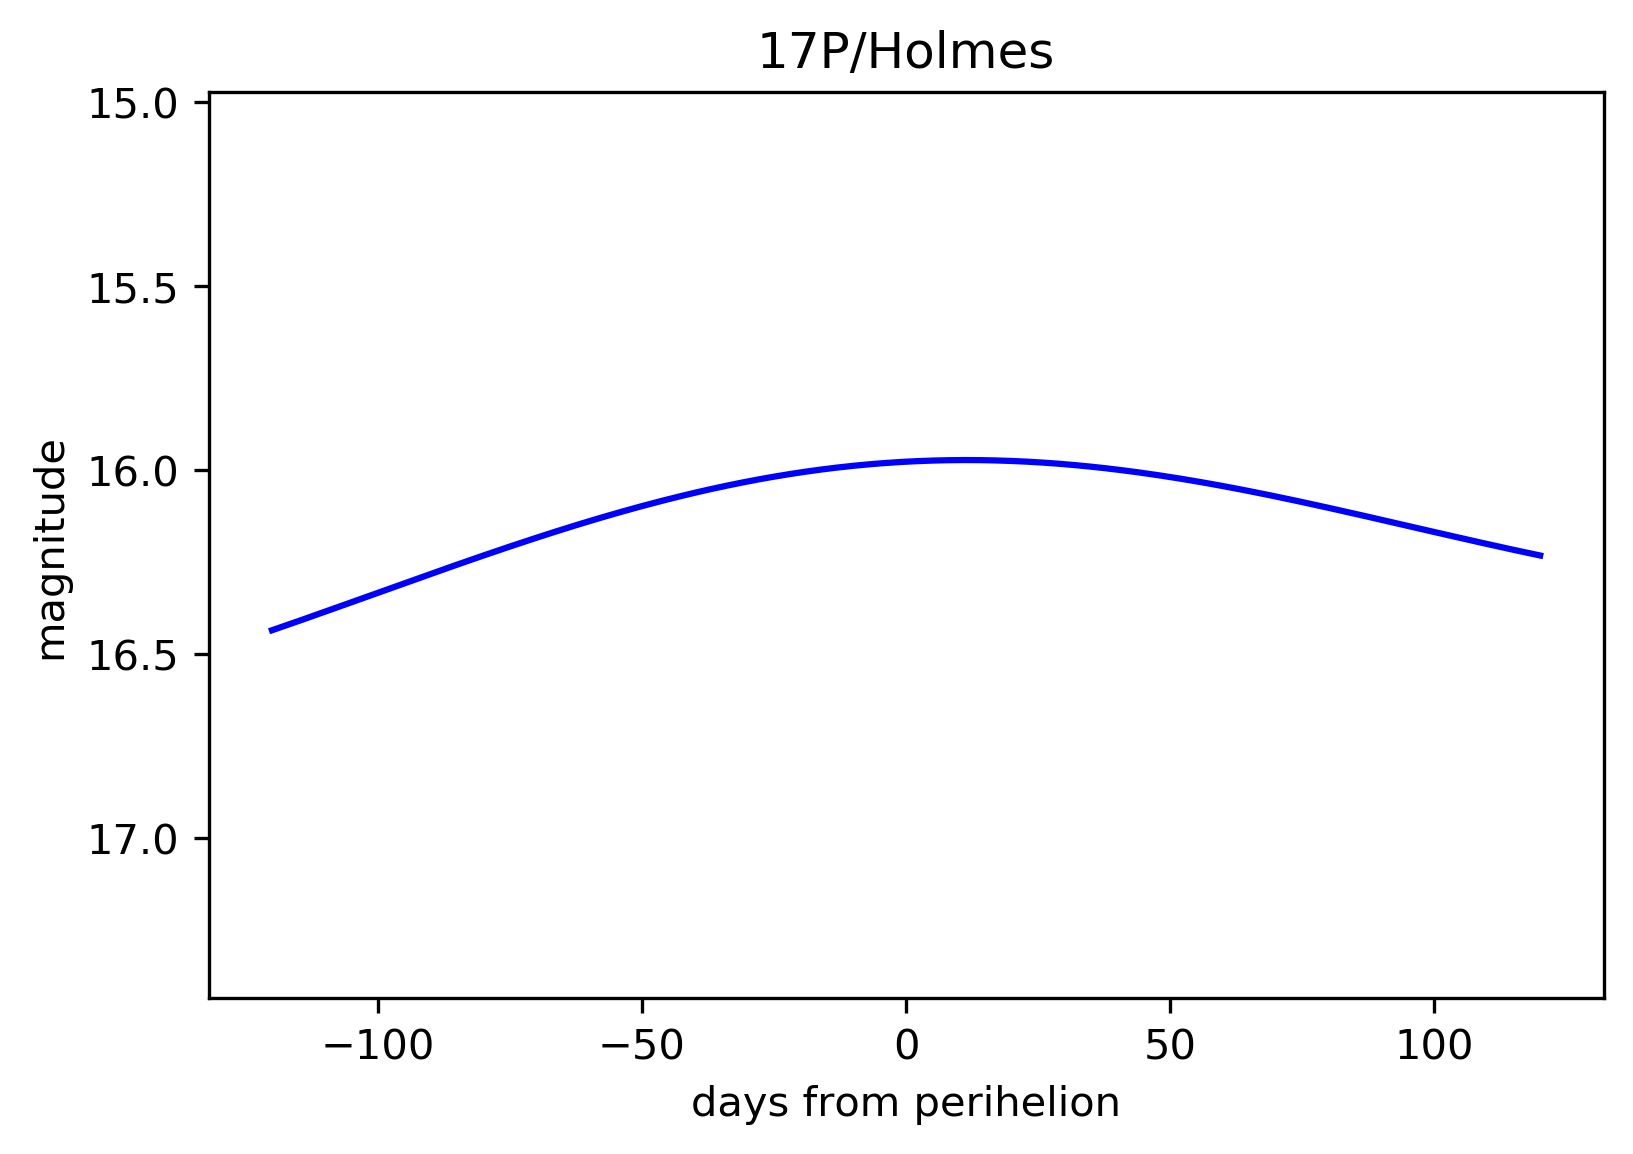

In [103]:
#单独出图
for i1 in range(0,10):
    plt.figure(figsize = [6,4],dpi=300)
    plt.plot(x,yd[i1],color = 'blue')
    plt.ylim(max(yd[i1])+1,min(yd[i1])-1)
    plt.title(legend1[i1])
    plt.xlabel('days from perihelion')
    plt.ylabel('magnitude')
    plt.savefig(legend2[i1] + ".jpg")

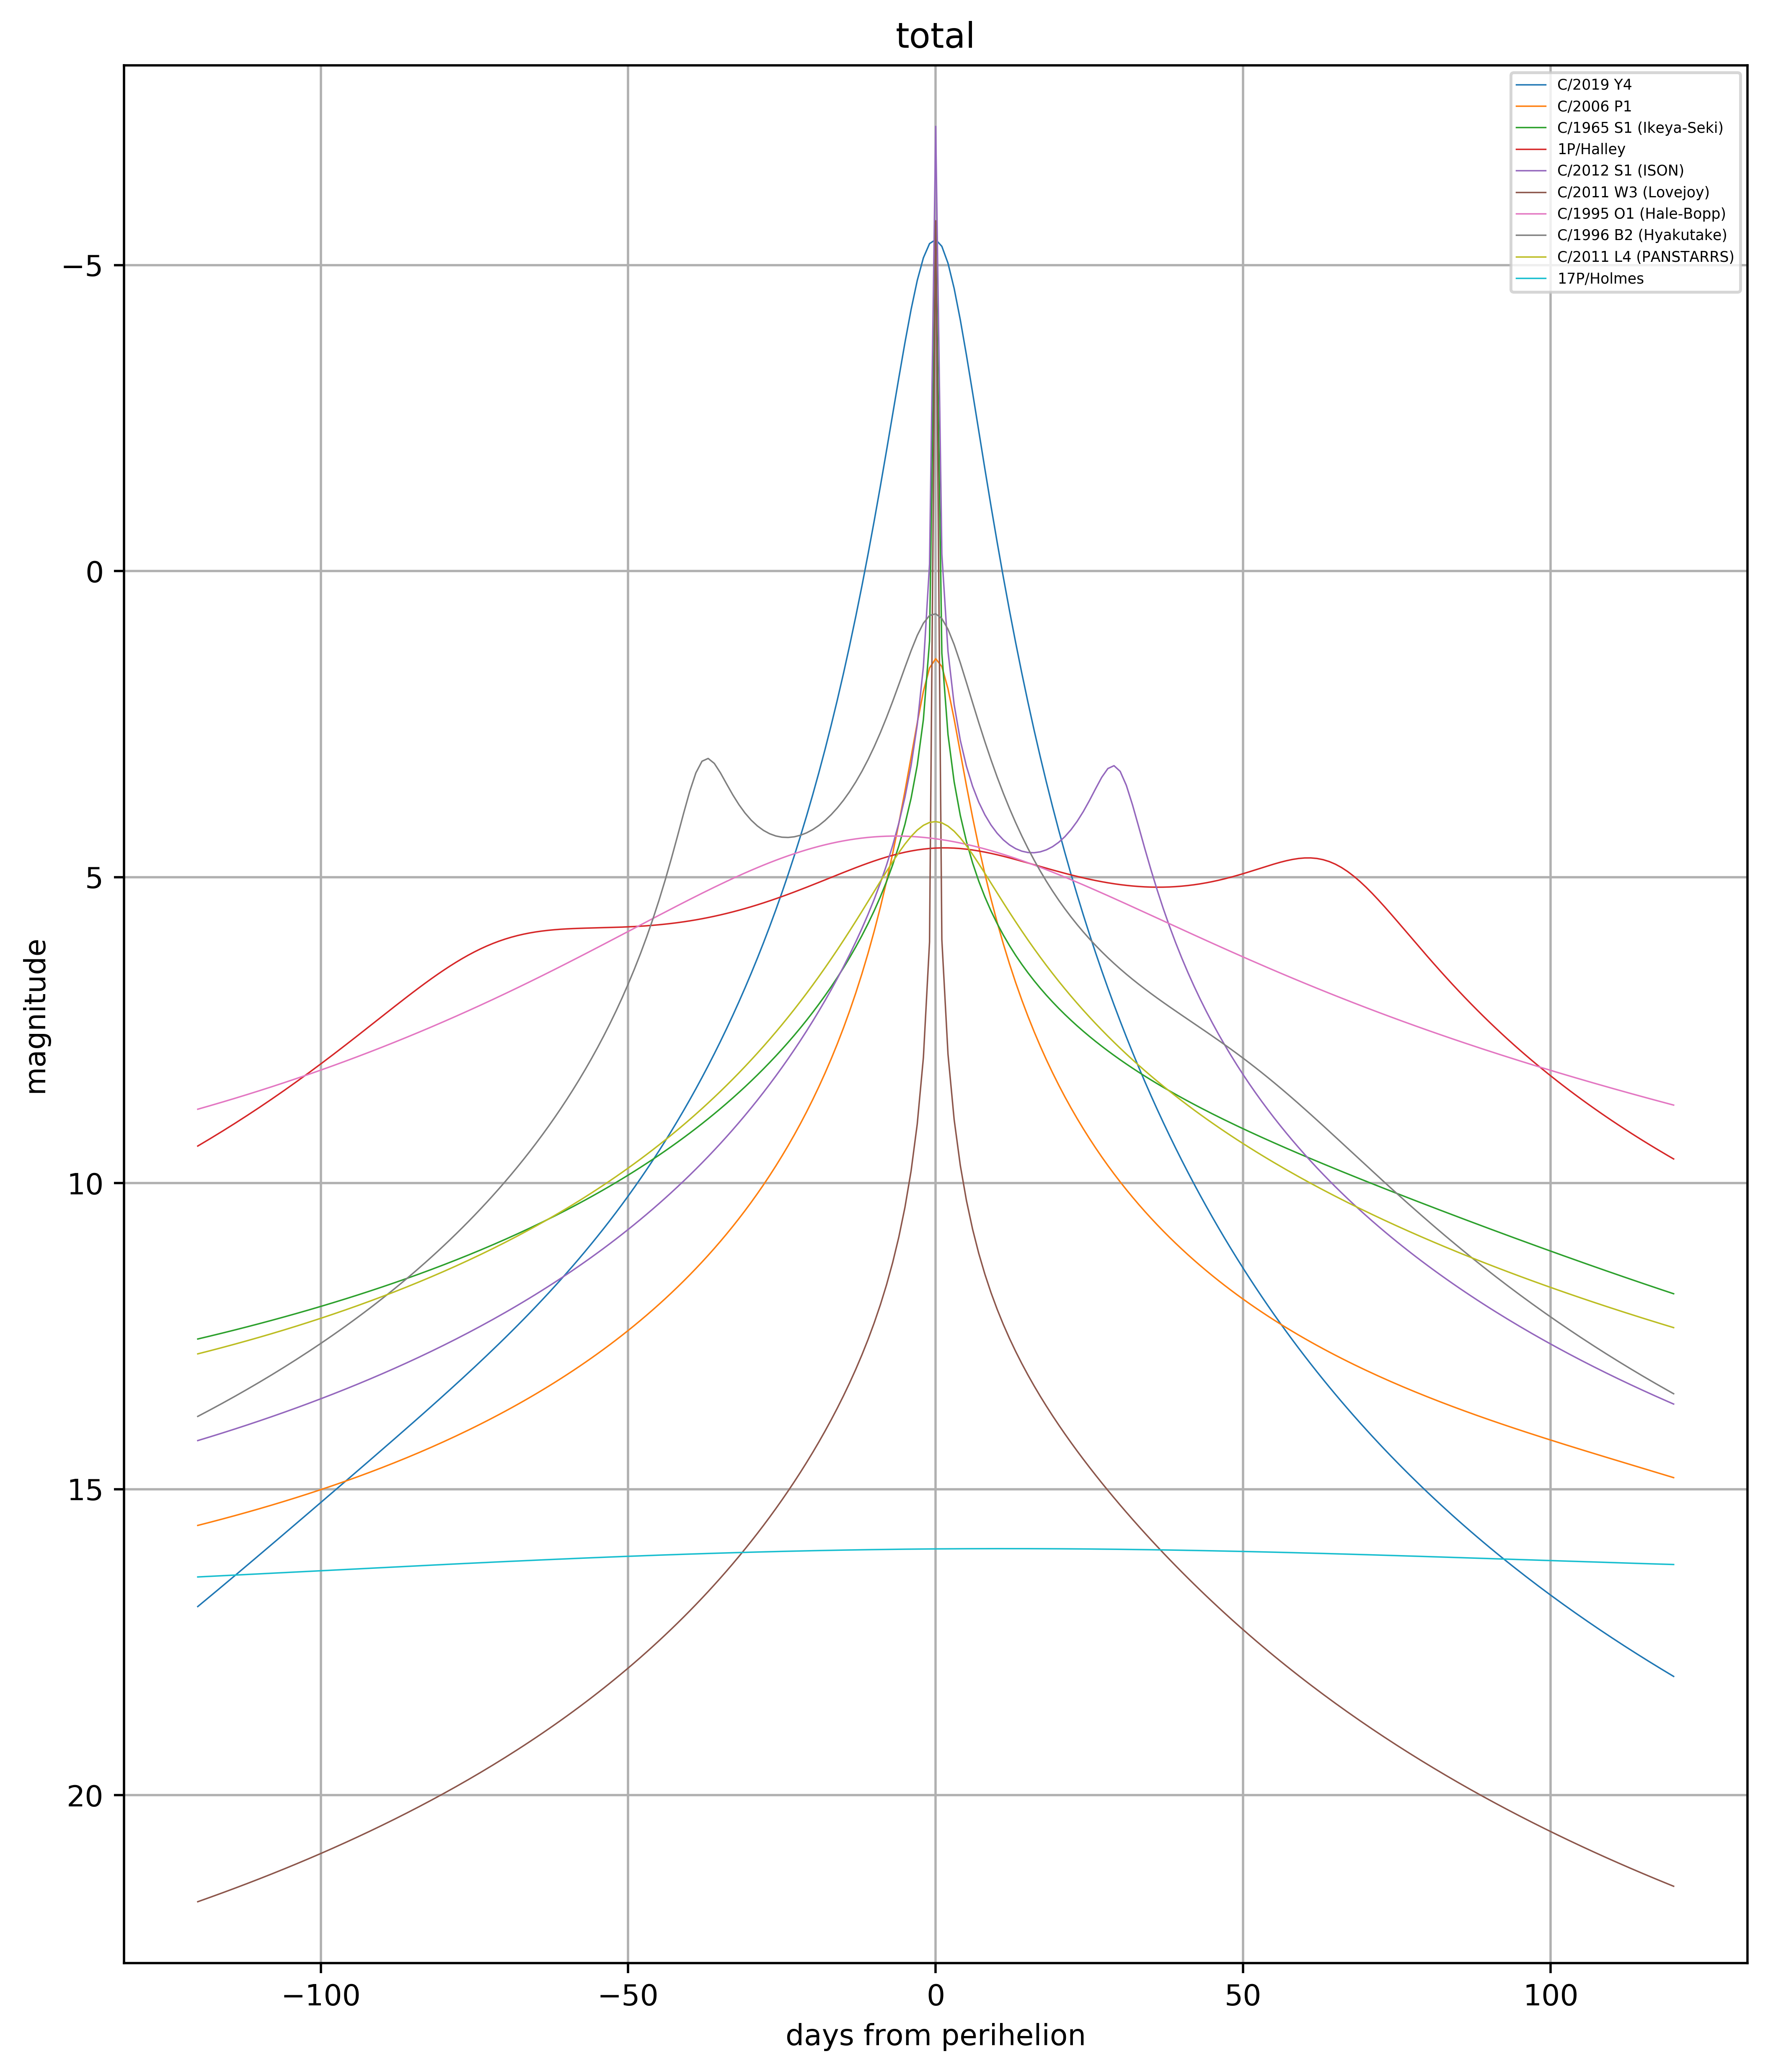

In [120]:
#合并出图
plt.figure(figsize = [10,12],dpi=500)
plt.title('total')
plt.xlabel('days from perihelion')
plt.ylabel('magnitude')
order = [0,3,4,5,6,7,8,9,1,2]
for i1 in range(0,10):
    plots.append(plt.plot(x,yd[i1],label = legend1[i1],linewidth=0.5))
plt.legend(fontsize=5)
plt.ylim(max(ya)+1,min(ya)-1)
plt.grid()
plt.savefig("total.jpg")
plt.show()

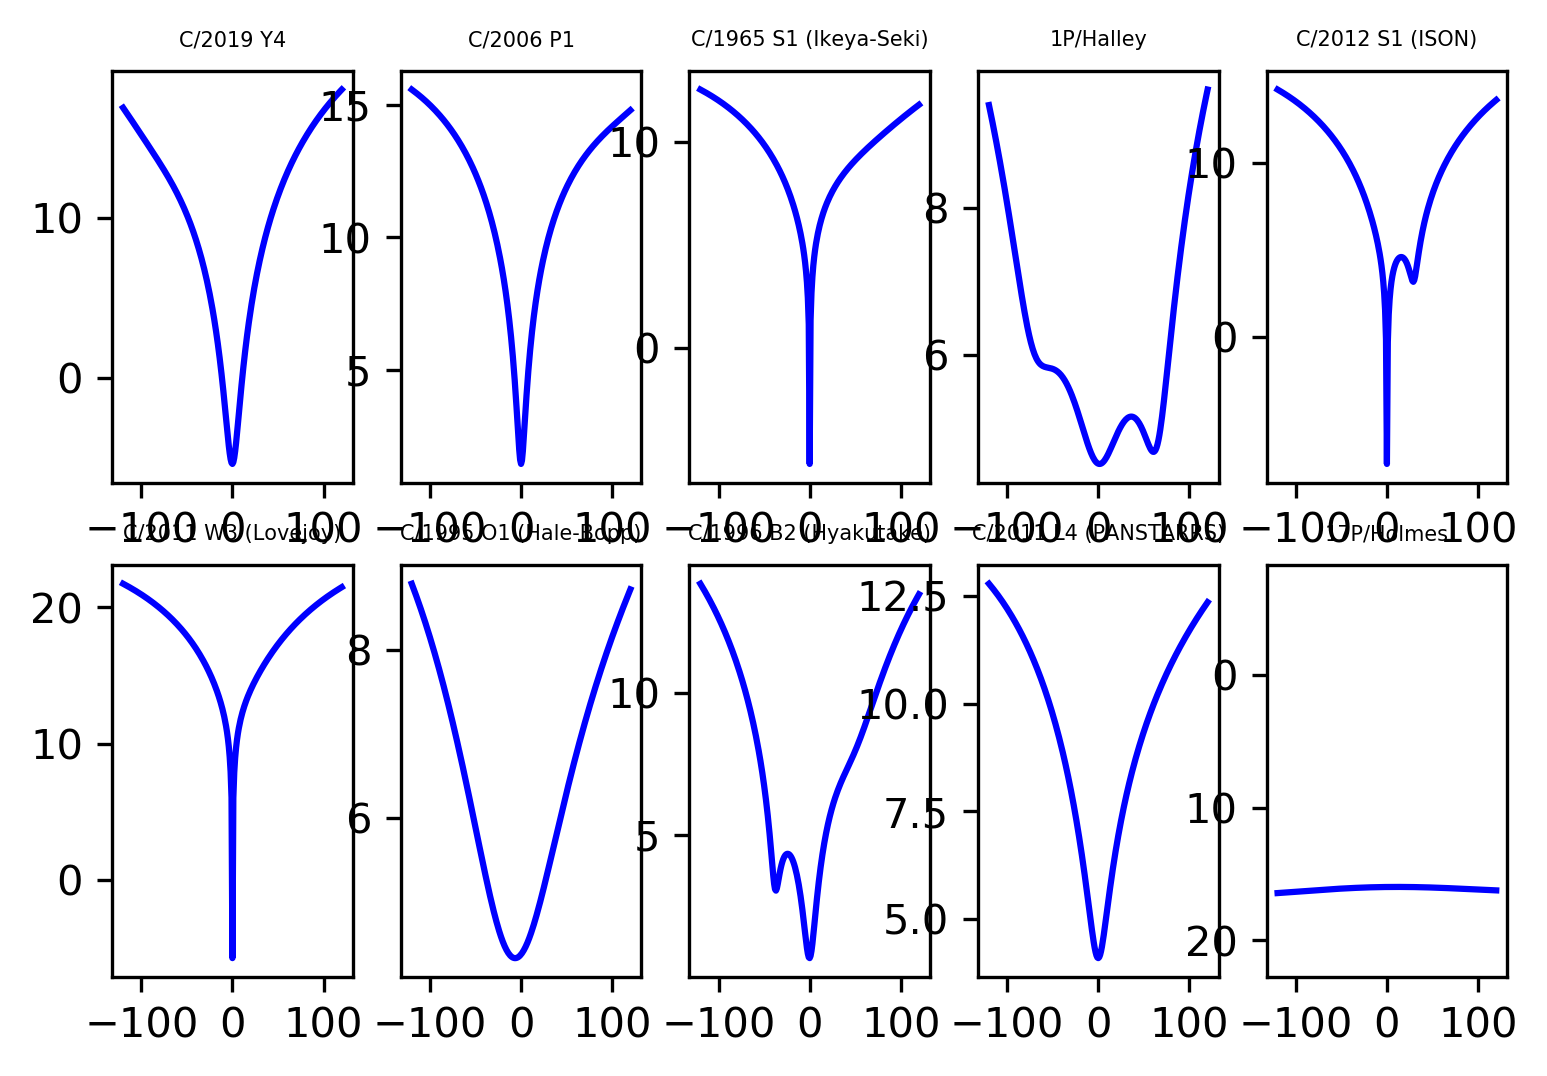

In [94]:
#拼合
plt.figure(figsize = [6,4],dpi=300)
plt.title('total')
plt.xlabel('days from perihelion')
plt.ylabel('magnitude')
for i1 in range(0,10):
    plt.subplot(2,5,i1+1)
    plt.plot(x,yd[i1],color='blue')
    plt.title(legend1[i1],fontsize = 5)
plt.ylim(max(ya)+1,min(ya)-1)
plt.savefig("total2.jpg")
plt.show()

In [ ]:
# orbit circle
orbc = [[],[],[]] #comet[[xs],[ys],[zs]]
orbe = [[],[],[]] #earth
orbm = [[],[],[]] #mars
orbj = [[],[],[]] #jupiter
orbs = [[],[],[]] #saturn

#orbit path
for nu1 in np.linspace(0,360,300):
    orb = Orbit.from_classical(Sun,a,ecc,inc,raan,argp,nu1 * u.deg)
    #这里需要修改sj.inc-dinc为负数的问题
    #或者说这里是否需要-dinc（彗星倾角问题）
    orb2 = Orbit.from_classical(Sun,se.a,se.ecc,se.inc - dinc,se.raan,se.argp,nu1 * u.deg)
    orb3 = Orbit.from_classical(Sun,sm.a,sm.ecc,sm.inc - dinc,sm.raan,sm.argp,nu1 * u.deg)
    orb4 = Orbit.from_classical(Sun,sj.a,sj.ecc,(math.pi) * u.rad + sj.inc - dinc,sj.raan,sj.argp,nu1 * u.deg)
    orb5 = Orbit.from_classical(Sun,ss.a,ss.ecc,(math.pi) * u.rad + ss.inc - dinc,ss.raan,ss.argp,nu1 * u.deg)
    p1 = orb.represent_as(CartesianRepresentation)
    p2 = orb2.represent_as(CartesianRepresentation)
    p3 = orb3.represent_as(CartesianRepresentation)
    p4 = orb4.represent_as(CartesianRepresentation)
    p5 = orb5.represent_as(CartesianRepresentation)
    dis = (p1.x.value**2 + p1.y.value**2 + p1.z.value**2)**(1/2)
    if(dis < 3 * 1.5 * 10**9):
        orbc[0].append(p1.x.value)
        orbc[1].append(-p1.y.value)
        orbc[2].append(-p1.z.value)
    orbe[0].append(p2.x.value)
    orbe[1].append(-p2.y.value)
    orbe[2].append(-p2.z.value)
    orbm[0].append(p3.x.value)
    orbm[1].append(-p3.y.value)
    orbm[2].append(-p3.z.value)
    orbj[0].append(p4.x.value)
    orbj[1].append(-p4.y.value)
    orbj[2].append(-p4.z.value)
    orbs[0].append(p5.x.value)
    orbs[1].append(-p5.y.value)
    orbs[2].append(-p5.z.value)
    

    #print(count)

#plt.savefig("C:/Users/MizarZ/Desktop/plottry.png",dpi=300)

<IPython.core.display.Javascript object>


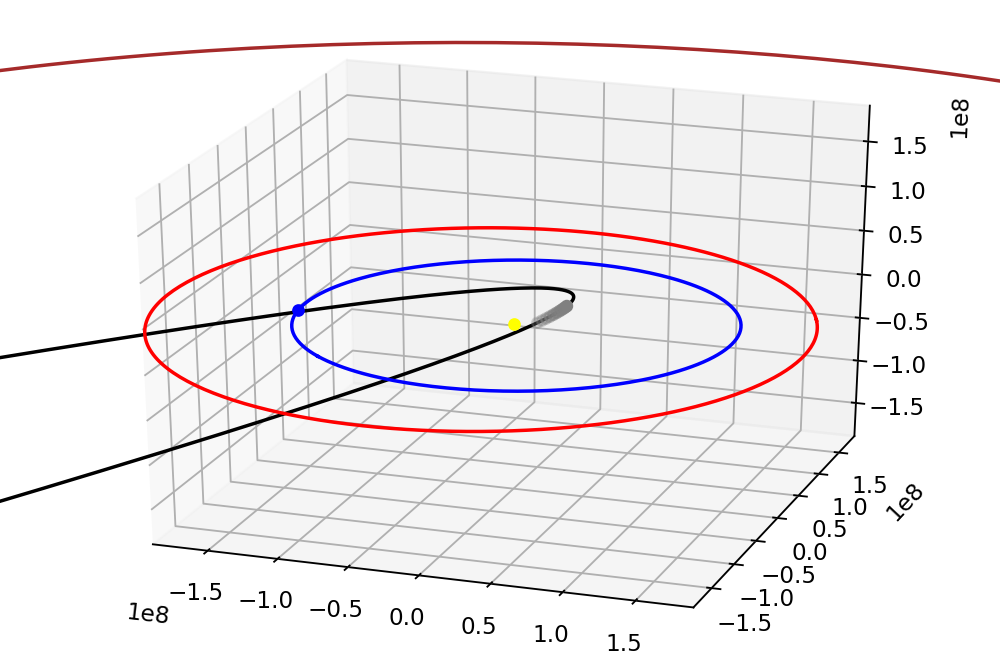

In [65]:
%matplotlib notebook
#ax1 = plt.axes(projection="3d")
fig = plt.figure(figsize=[6,4],dpi=100)
ax1 = Axes3D(fig)
lim = 3*149597871

ax1.set_xlim3d(-lim,lim)
ax1.set_ylim3d(-lim,lim)
ax1.set_zlim3d(-lim,lim)

ax1.plot3D(orbc[0],orbc[1],orbc[2],color="black")
ax1.plot3D(orbe[0],orbe[1],orbe[2],color="blue")
ax1.plot3D(orbm[0],orbm[1],orbm[2],color="red")
ax1.plot3D(orbj[0],orbj[1],orbj[2],color="brown")
ax1.plot3D(orbs[0],orbs[1],orbs[2],color="yellow")

ax1.scatter3D(0,0,0,color="yellow")
ax1.scatter3D(xn1,yn1,zn1,color="gray")
ax1.scatter3D(xn2,yn2,zn2,color="blue")

ax1.mouse_init()
plt.show()

In [ ]:
#后面为备用代码

In [41]:
from astropy.time import Time
from astropy import units as u
from poliastro.bodies import Earth, Mars, Sun, Jupiter, Saturn
from poliastro.twobody import Orbit
from poliastro.plotting.static import StaticOrbitPlotter
from poliastro.twobody.propagation import mean_motion, kepler, cowell
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from astropy.coordinates import SphericalRepresentation
from astropy.coordinates import CartesianRepresentation
import numpy as np
import math
days = 120
#orbital elements
#C/2019 Y4
time = "2020-05-31T00:51:39"
t = Time(time, format='isot', scale='tdb')
a = 334.7437609364131 * u.AU
ecc = 0.9992446427560783 * u.one
inc = 45.38173634030989 * u.deg
raan = 120.569994312319 * u.deg
argp = 177.4078594843987 * u.deg
#C/2006 P1
time = "2007-01-12T20:55:48"
t = Time(2454113.298853878393, format='jd', scale='tdb')
a = -8953.846942964639  * u.AU
ecc = 1.000019068501381 * u.one
inc = 77.83699331528216 * u.deg
raan = 267.4147914157445 * u.deg
argp = 155.974955723039 * u.deg
#C/1965 S1 (Ikeya-Seki)
t = Time(2439054.6837, format='jd',scale='tdb')
a = 91.6000000  * u.AU
ecc = 0.999915 * u.one
inc = 141.8642 * u.deg
raan = 346.9947 * u.deg
argp = 69.0486 * u.deg
#1P/Halley
t = Time(2446467.395317050925, format='jd',scale='tdb')
a = 17.8341442925537  * u.AU
ecc = 0.967142908462304 * u.one
inc = 162.262690579161 * u.deg
raan = 58.42008097656843  * u.deg
argp = 111.3324851045177 * u.deg
#C/2012 S1 (ISON)
t = Time(2456625.278658273561, format='jd',scale='tdb')
a = -61.95201446552018  * u.AU
ecc = 1.000201003833968 * u.one
inc = 62.40397752235779 * u.deg
raan = 295.65203155  * u.deg
argp = 345.5312406205832  * u.deg
#C/2011 W3 (Lovejoy)
t = Time(2455911.511809000032, format='jd',scale='tdb')
a = 78.68293963959538  * u.AU
ecc = 0.9999294152687143 * u.one
inc = 134.3558107377023 * u.deg
raan = 326.3691470244605  * u.deg
argp = 53.50921241435645  * u.deg
#C/1995 O1 (Hale-Bopp)
t = Time(2450538.437848275592, format='jd',scale='tdb')
a = 182.0519703474959  * u.AU
ecc = 0.9949607008417696  * u.one
inc = 89.21708989130315 * u.deg
raan = 282.9487539423989  * u.deg
argp = 130.662020526416  * u.deg
#C/1996 B2 (Hyakutake)
t = Time(2450204.894088137433, format='jd',scale='tdb')
a = 2272.079439771763  * u.AU
ecc = 0.9998986702212276 * u.one
inc = 124.9226625944912 * u.deg
raan = 188.0452284985425  * u.deg
argp = 130.1740835084622  * u.deg
#C/2011 L4 (PANSTARRS)
t = Time(2456361.669949932096, format='jd',scale='tdb')
a = -9217.613572306012  * u.AU
ecc = 1.000032713934215 * u.one
inc = 84.20818671265653 * u.deg
raan = 65.66588341697526  * u.deg
argp = 333.6516382152546  * u.deg
#17P/Holmes
t = Time(2456744.012627847256, format='jd',scale='tdb')
a = 3.619609985314088  * u.AU
ecc = 0.4318134405110877 * u.one
inc = 19.09175525320228 * u.deg
raan = 326.764799658168  * u.deg
argp = 24.515349359396  * u.deg
#planets' elements
se = Orbit.from_body_ephem(Earth,t)
sm = Orbit.from_body_ephem(Mars,t)
sj = Orbit.from_body_ephem(Jupiter,t)
ss = Orbit.from_body_ephem(Saturn,t)
sc = Orbit.from_classical(Sun,a,ecc,inc,raan,argp,0 * u.deg,t) #彗星近日点位置
setemp = Orbit.from_classical(Sun,se.a,se.ecc,se.inc,se.raan,se.argp,se.nu,t)
dinc = se.inc

#orbit per day
orbnc = [[],[],[]] #comet[[xs],[ys],[zs]]
orbne = [[],[],[]] #earth


#comet/planets position at some time
xn1 = []
yn1 = []
zn1 = []

r = []
d = []

for x in np.linspace(-days * u.day,days * u.day, days* 2 + 1):
    orbnctemp = sc.propagate(x,method = mean_motion)
    pn1 = orbnctemp.represent_as(CartesianRepresentation)
    orbnc[0].append(pn1.x.value)
    orbnc[1].append(-pn1.y.value)
    orbnc[2].append(-pn1.z.value)
    xc = pn1.x.value / (1.5 * 10**8)
    yc = pn1.y.value / (1.5 * 10**8)
    zc = pn1.z.value / (1.5 * 10**8)
    orbnetemp = setemp.propagate(x,method = mean_motion)
    pn2 = orbnetemp.represent_as(CartesianRepresentation)
    orbne[0].append(pn2.x.value)
    orbne[1].append(-pn2.y.value)
    orbne[2].append(-pn2.z.value)
    xe = pn2.x.value / (1.5 * 10**8)
    ye = pn2.y.value / (1.5 * 10**8)
    ze = pn2.z.value / (1.5 * 10**8)
    r.append(math.sqrt(xc**2+yc**2+zc**2))
    d.append(math.sqrt((xe-xc)**2+(ye-yc)**2+(ze-zc)**2))
    


'''
for x in np.linspace(-30,30,10):
    orbn = Orbit.from_classical(Sun,a,ecc,inc,raan,argp,x * u.deg)
    pn1 = orbn.represent_as(CartesianRepresentation)
    xn1.append(pn1.x.value)
    yn1.append(-pn1.y.value)
    zn1.append(-pn1.z.value)
'''
'''
orbn2 = Orbit.from_classical(Sun,se.a,se.ecc,se.inc - dinc,se.raan,se.argp,se.nu)
pn2 = orbn2.represent_as(CartesianRepresentation)
#planet now
#待添加除地球外其他行星
xn2 = pn2.x.value
yn2 = -pn2.y.value
zn2 = -pn2.z.value
'''
print("end")

end


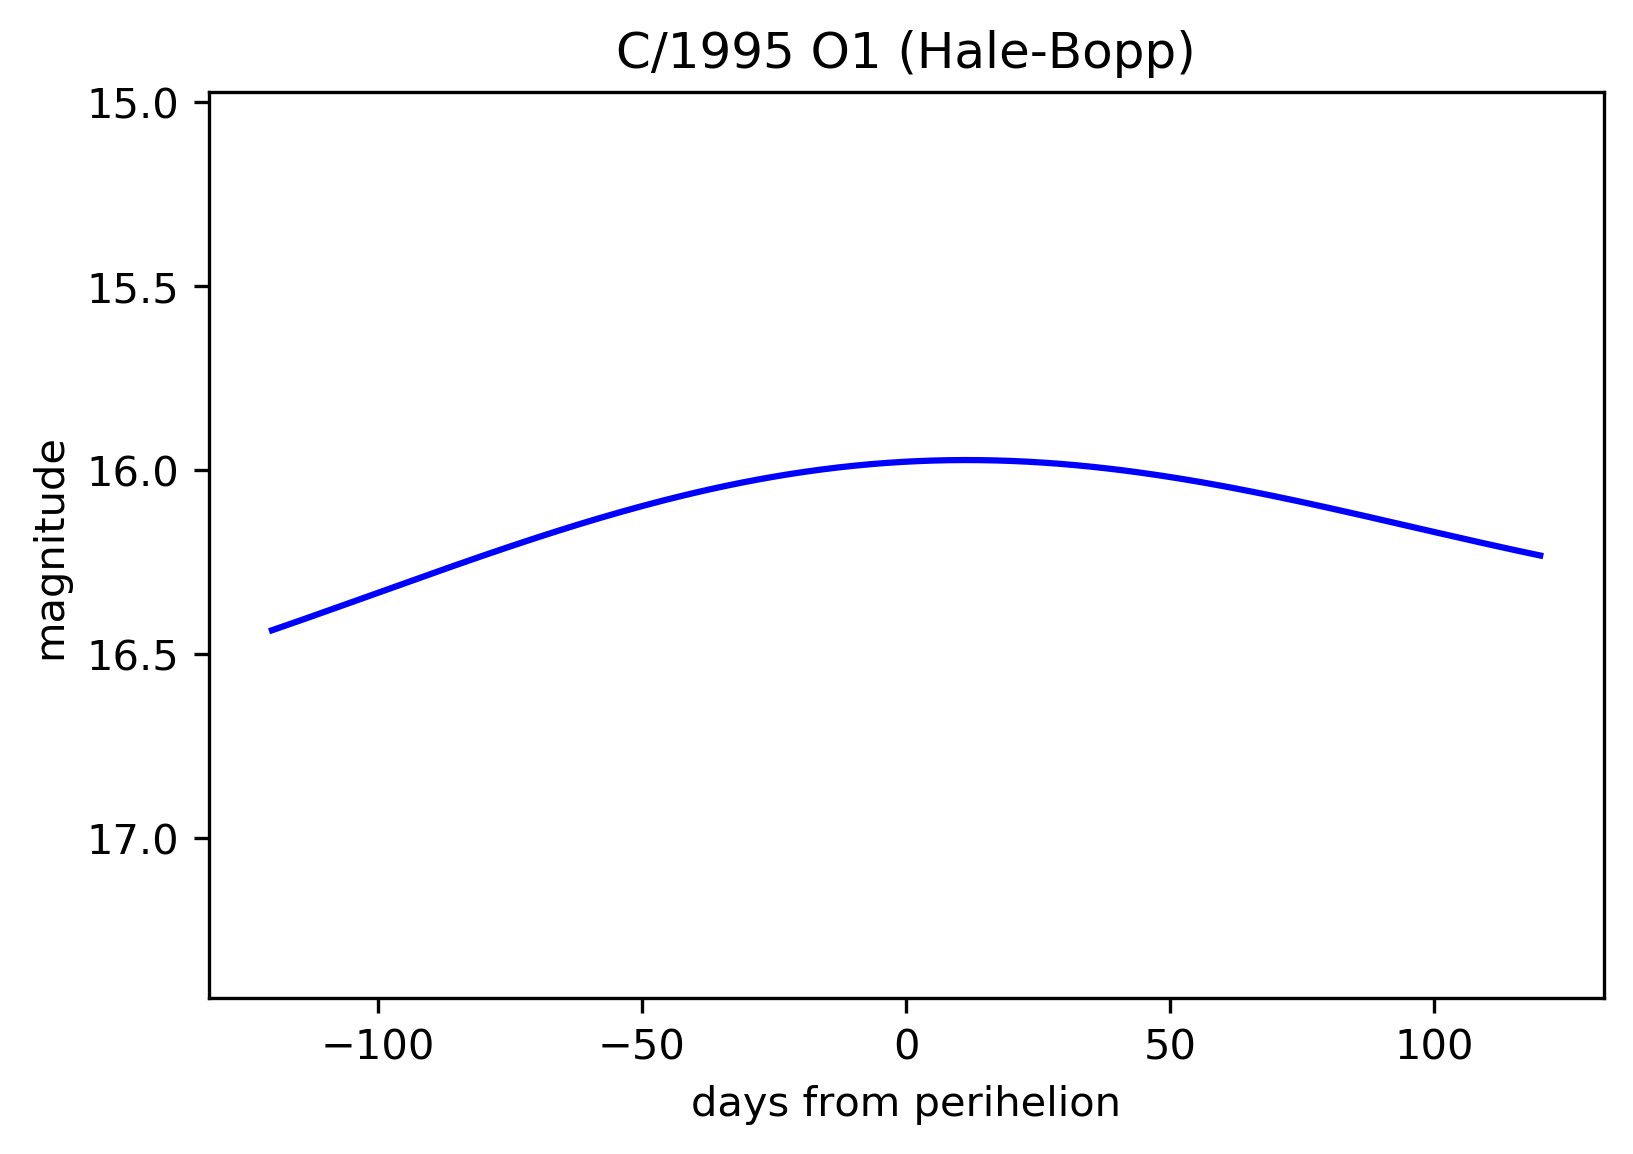

In [25]:
import matplotlib.pylab as plt
#m = M + 5lgd + klgr
#Y4
M = 3.94
k = 25
#C/2006 P1
M=9.5
k=10
#1P/Halley
M=5.5
k=8.0
#C/2012 S1 (ISON)
M=8
k=8
#C/2011 W3 (Lovejoy)
M=15.3
k=9.3
#C/1995 O1 (Hale-Bopp)
M=-0.64
k=8.55
#C/1996 B2 (Hyakutake)
M=7.3
k=11
#C/2011 L4 (PANSTARRS)
M=7.5
k=7
#17P/Holmes
M=8.9
k=15

y = []
y1 = []
y2 = []

for x in np.linspace(0,days*2,days*2+1):
    x = int(x)
    y.append(M + 5 * math.log10(d[x]) + k * math.log10(r[x]))
    #y1.append(M + 5 * math.log10(d[x]) + k * math.log10(r[x]))
    #y2.append(12 + 5 * math.log10(d[x]) + 10 * math.log10(r[x]))
    
x = np.linspace(-days,days,days*2+1)
plt.figure(figsize = [6,4],dpi=300)
plt.xlabel('days from perihelion')
plt.ylabel('magnitude')
plt.title('C/1995 O1 (Hale-Bopp)')
plt.plot(x,y,color="blue")

plt.ylim(max(y)+1,min(y)-1)
#plt.plot(x,y1,color="blue")
#plt.plot(x,y2,color="red")
#plt.ylim(max([max(y1),max(y2)])+1,min([min(y1),min(y2)])-1)
plt.savefig("C_1995_O1_(Hale-Bopp)(2).jpg")
plt.show()


In [27]:
np.linspace(0,100)

array([  0.        ,   2.04081633,   4.08163265,   6.12244898,
         8.16326531,  10.20408163,  12.24489796,  14.28571429,
        16.32653061,  18.36734694,  20.40816327,  22.44897959,
        24.48979592,  26.53061224,  28.57142857,  30.6122449 ,
        32.65306122,  34.69387755,  36.73469388,  38.7755102 ,
        40.81632653,  42.85714286,  44.89795918,  46.93877551,
        48.97959184,  51.02040816,  53.06122449,  55.10204082,
        57.14285714,  59.18367347,  61.2244898 ,  63.26530612,
        65.30612245,  67.34693878,  69.3877551 ,  71.42857143,
        73.46938776,  75.51020408,  77.55102041,  79.59183673,
        81.63265306,  83.67346939,  85.71428571,  87.75510204,
        89.79591837,  91.83673469,  93.87755102,  95.91836735,
        97.95918367, 100.        ])

AttributeError: 'list' object has no attribute 'concat'

In [6]:
print(69020.975232 % 24)

20.97523199999705


In [7]:
2875.873968%60

55.87396799999988

0.0
